In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd

In [2]:
data_path = "Dataset"

# Understand The Labeling

First we need to understand how work each values in a label file.txt.

- We already know that an name_image.jpg have a label name_image.txt.
- We assume that the first number write in a label correspond to describe a class.
- We suppose there is just one class annoted by 0.
- Yolo notation is for one label : class x y width height, so we will look in this direction.
First we create dataframes which contains each values in each labels

In [3]:
def data_location(fold):
  """ Create dataframe for labels of the folder input """
  class_instances = []
  x_centers = []
  y_centers = []
  widths = []
  heights = []
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          for line in lines:
            label = line.split(' ')
            class_instances.append(float(label[0]))
            x_centers.append(float(label[1]))
            y_centers.append(float(label[2]))
            widths.append(float(label[3]))
            heights.append(float(label[4]))
  return pd.DataFrame({
      'class' : class_instances,
      'x_center' :  x_centers,
      'y_center' : y_centers,
      'width' : widths,
      'height' :  heights
  })
     

In [4]:
df_location_train = data_location('train')
df_location_train.head()

,class,x_center,y_center,width,height
0,0.0,0.600962,0.421875,0.423077,0.468750
1,0.0,0.521635,0.414663,0.236779,0.276442
2,0.0,0.533654,0.407452,0.307692,0.319712
3,0.0,0.593750,0.431490,0.332933,0.449519
4,0.0,0.599760,0.433894,0.350962,0.471154


In [5]:
df_location_valid = data_location('valid')
df_location_valid.head()

,class,x_center,y_center,width,height
0,0.0,0.487981,0.490385,0.604567,0.694712
1,0.0,0.276442,0.814904,0.282452,0.265625
2,0.0,0.192308,0.403846,0.075721,0.173077
3,0.0,0.449519,0.156250,0.167067,0.135817
4,0.0,0.959135,0.129808,0.068510,0.183894


In [6]:
df_location_test = data_location('test')
df_location_test.head()

,class,x_center,y_center,width,height
0,0.0,0.495192,0.495192,0.322115,0.456731
1,0.0,0.397837,0.506010,0.076923,0.075721
2,0.0,0.258413,0.579327,0.061298,0.134615
3,0.0,0.287260,0.640625,0.066106,0.100962
4,0.0,0.367788,0.644231,0.066106,0.115385


## A. Load an image

Image n°500 : frame_00675_png.rf.aff44ba65776cba5eedc82645f714c8f.jpg


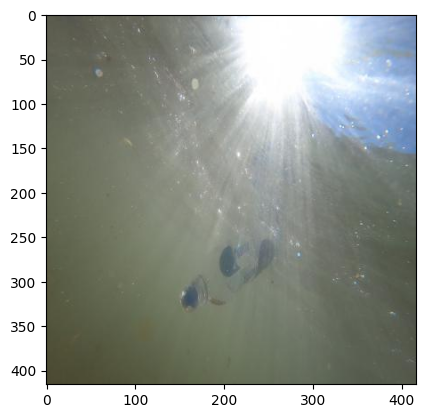

In [7]:
#load an image, plot it
i = 500
fold_path = os.path.join(data_path, 'train/images')
filenames = os.listdir(fold_path)
name = filenames[i]
print('Image n°{} : {}'.format(i, name))
file_path = os.path.join(fold_path, filenames[i])
im = np.array(Image.open(file_path))
plt.imshow(im)

## B. Get its label

In [8]:
#get the label of the image
fold_path = os.path.join(data_path, 'train/labels')
filenames = os.listdir(fold_path)
for filename in filenames:
  if name.split('.jpg')[0] == filename.split('.txt')[0]:
    filepath = os.path.join(fold_path, filename)
    f = open(filepath, 'r')
    lines = f.readlines()
    labels = []
    for line in lines:
      label = line.split()
      label = [float(i) for i in label]
      labels.append(label)
    f.close()
    break

print(labels)

[[0.0, 0.5060096153846154, 0.6754807692307693, 0.2920673076923077, 0.2764423076923077]]


## C. Annoted image

### Test

(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

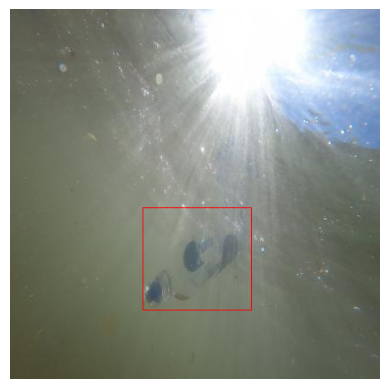

In [9]:
#load an image, from its label annoted the image
im =  Image.open(file_path)
image_width, image_height = im.size
fig, ax = plt.subplots()
ax.imshow(im)

draw = ImageDraw.Draw(im)
for label in labels:
  _, x_center, y_center, width, height = label
  x_center *= image_width
  y_center *= image_height
  width *= image_width
  height *= image_height
  top_left_x = x_center - (width / 2)
  top_left_y = y_center - (height / 2)
  bottom_right_x = x_center + (width / 2)
  bottom_right_y = y_center + (height / 2)
  draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

plt.imshow(im)
plt.axis('off')

### Final function to see annoted_image

In [10]:
def annoted_image(image_name, fold='train'):
  """ Resume each previous step.
  Give the name of the image, and in which folder is it (not the path),
  fold = train, valid or test"""
  fold_path = os.path.join(data_path, fold + '/labels')
  filenames = os.listdir(fold_path)
  for filename in filenames:
    if image_name.split('.jpg')[0] == filename.split('.txt')[0]:
      filepath = os.path.join(fold_path, filename)
      f = open(filepath, 'r')
      lines = f.readlines()
      labels = []
      for line in lines:
        label = line.split()
        label = [float(i) for i in label]
        labels.append(label)
      f.close()
      break

  fold_path = os.path.join(data_path, fold + '/images')
  file_path = os.path.join(fold_path, image_name)
  im =  Image.open(file_path)
  image_width, image_height = im.size
  fig, ax = plt.subplots()
  ax.imshow(im)

  draw = ImageDraw.Draw(im)
  for label in labels:
    _, x_center, y_center, width, height = label
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height
    top_left_x = x_center - (width / 2)
    top_left_y = y_center - (height / 2)
    bottom_right_x = x_center + (width / 2)
    bottom_right_y = y_center + (height / 2)
    draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

  plt.imshow(im)
  plt.axis('off')

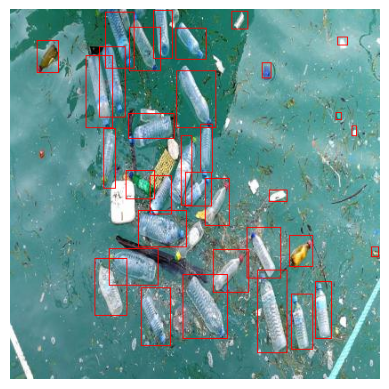

In [12]:
annoted_image('plastic20_jpg.rf.a89c0d5cf93b937170b5f02b3c23cf7d.jpg')

# Datasets

For each Dataset (train valid, test), we will create a dataframe which contains ,for each images :
- name of the image
- number of waste in the image

## A. Create DataFrame

In [13]:
def create_dataframe(fold):
  """ create dataframe with column name of the image and number of waste in the image """
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      exist = False
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          number_trash = np.append(number_trash,len(lines))
          f.close()
          exist = True
          break
      ims.append(image_name)
      if not exist:
        #the image don't have a label
        number_trash = np.append(number_trash, np.nan)

  res = {
      'image name' : ims,
      'number of waste' : number_trash
  }

  return pd.DataFrame(res)

## Train Dataset

In [14]:
df_train = create_dataframe('train')
df_train.head()

,image name,number of waste
0,10_jpg.rf.0f387beff9aa43e94e3eacada20a0063.jpg,1.0
1,10_jpg.rf.1829a2896fb876b4498c821aa860220f.jpg,1.0
2,10_jpg.rf.3f4f945e3eba5e91ef96df871380d17c.jpg,1.0
3,10_jpg.rf.aeb8b24febdfe306e8d5ebe3898b0b5c.jpg,1.0
4,10_jpg.rf.ba313adcbca98f1c105d068a540f3d97.jpg,1.0


In [15]:
#some informations about number of waste in image
df_train.describe()

,number of waste
count,1876.000000
mean,1.523454
std,2.951697
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,36.000000


In [16]:
# check if some labels are missing
df_train.isnull().sum()

image name         0
number of waste    0
dtype: int64

## Valid Dataset

In [17]:
df_valid = create_dataframe('valid')
df_valid.head()

,image name,number of waste
0,11_jpg.rf.e588236442342505d0112df8e25b86c4.jpg,1.0
1,12_png_jpg.rf.6808ca950110eaba980d13d7f3c9eb45...,16.0
2,13_jpg.rf.ca64cb2850955d53ce724205a55f88ee.jpg,1.0
3,15_jpg.rf.5a45959526883e979799fbf0dcad82be.jpg,13.0
4,17_jpg.rf.d2d76ef3aefe5a8c58321209c941cf0e.jpg,1.0


In [18]:
#some informations about number of waste in image
df_valid.describe()

,number of waste
count,624.000000
mean,1.373397
std,2.360047
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,34.000000


## Test Dataset

In [19]:
df_test = create_dataframe('test')
df_test.head()

,image name,number of waste
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.jpg,1.0
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.jpg,13.0
2,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.jpg,1.0
3,3_jpg.rf.b5a1109b740523b0b26bd41559856253.jpg,1.0
4,4_jpg.rf.468e8403cb432b60d298ad2d01f2d4ea.jpg,4.0


In [20]:
#some informations about number of waste in image
df_test.describe()

,number of waste
count,613.000000
mean,1.218597
std,1.415777
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


# Analysis

In [21]:
datasets = [df_train, df_valid, df_test]
datasets_names = ['Train', 'Valid', 'Test']

## A. Distribution of Trash Instances


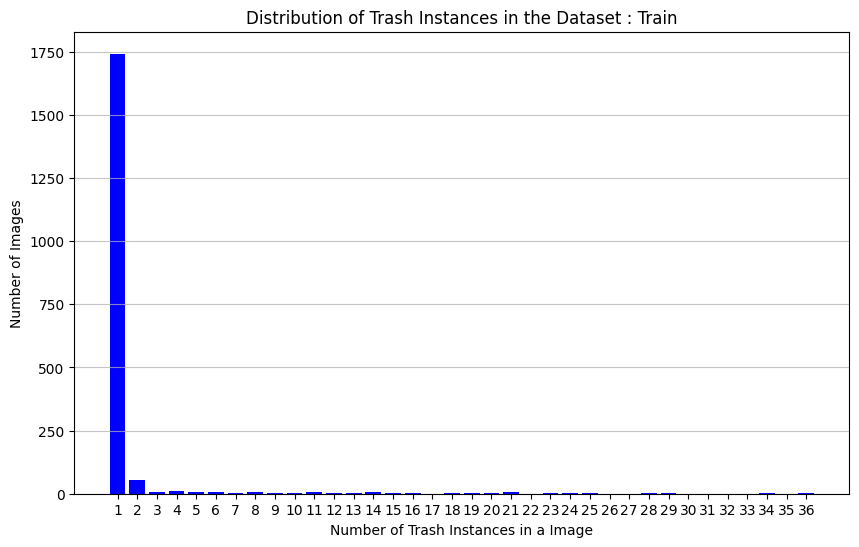

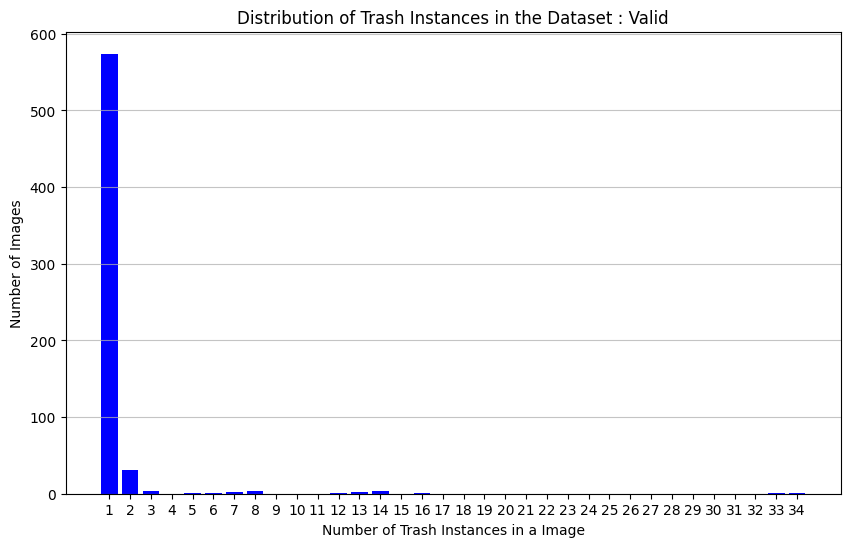

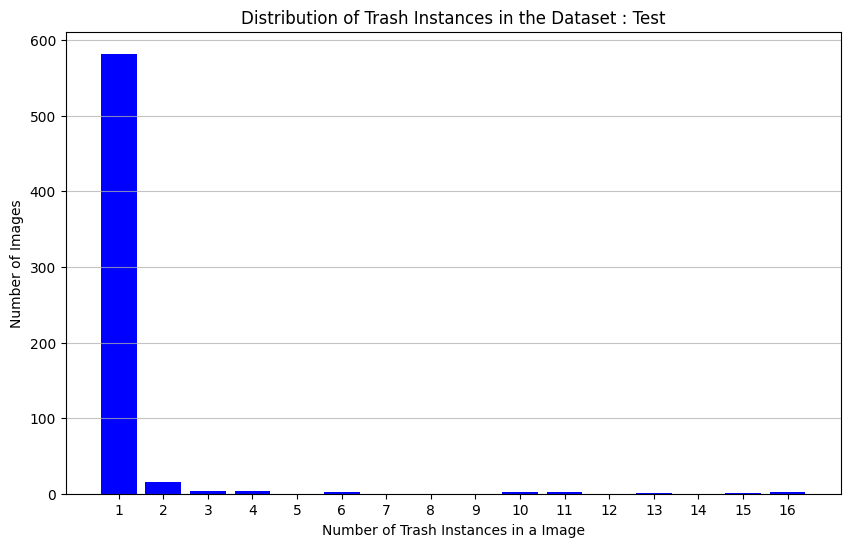

In [22]:
for i, df in enumerate(datasets):
  trash_counts = np.array(df['number of waste'])
  trash_counts = trash_counts.astype(int)
  plt.figure(figsize=(10, 6))
  plt.hist(trash_counts, bins=range(min(trash_counts), max(trash_counts) + 2), align='left', rwidth=0.8, color='blue')
  plt.xlabel('Number of Trash Instances in a Image')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Trash Instances in the Dataset : ' + datasets_names[i])
  plt.xticks(range(min(trash_counts), max(trash_counts) + 1))
  plt.grid(axis='y', alpha=0.75)
  plt.show()

## B. Repartition of Trash Locations

In [23]:
def heat_map(df, fold):
  fig, ax = plt.subplots()
  for index, row in df.iterrows():
      # Calculate the coordinates of the rectangle
      x = row['x_center'] - row['width'] / 2
      y = row['y_center'] - row['height'] / 2
      width = row['width']
      height = row['height']

      # Create a rectangle and add it to the plot
      rectangle = plt.Rectangle((x, y), width, height, facecolor="blue", edgecolor="black", alpha=0.005)
      ax.add_patch(rectangle)

  # Set axis labels or any other plot settings if needed
  ax.set_xlabel('X-axis label')
  ax.set_ylabel('Y-axis label')
  ax.invert_yaxis()

  # Show the plot
  plt.title('Garbage Location heatmap for Dataset ' + fold)
  plt.show()

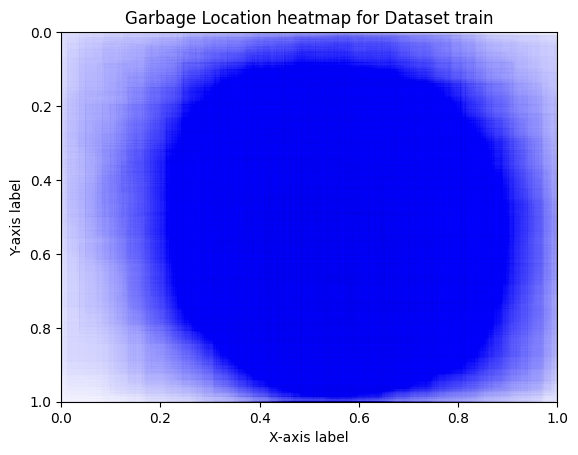

In [24]:
heat_map(df_location_train, 'train')

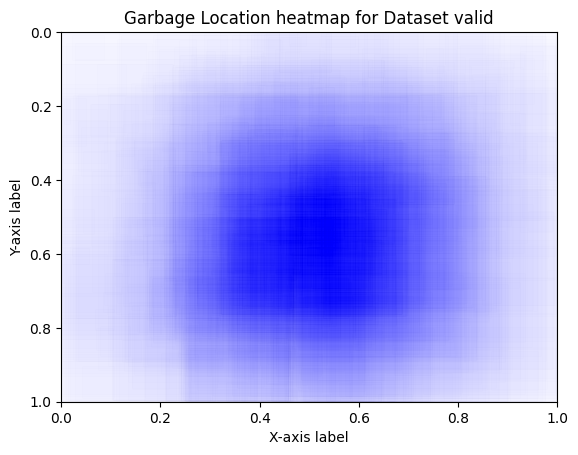

In [25]:
heat_map(df_location_valid, 'valid')

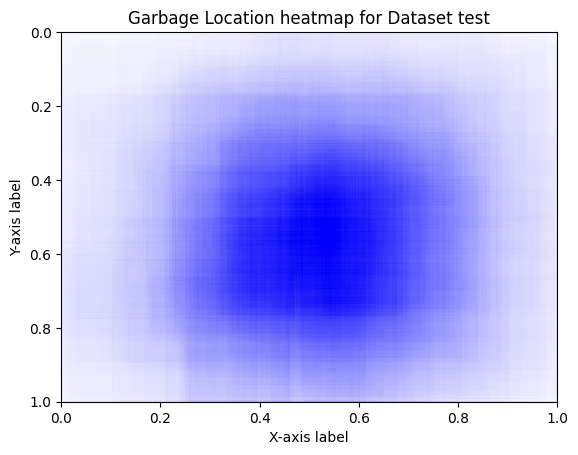

In [26]:
heat_map(df_location_valid, 'test')